In [3]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

print("\n Iris dataset loaded successfully!")
print(df.head())


 Iris dataset loaded successfully!
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


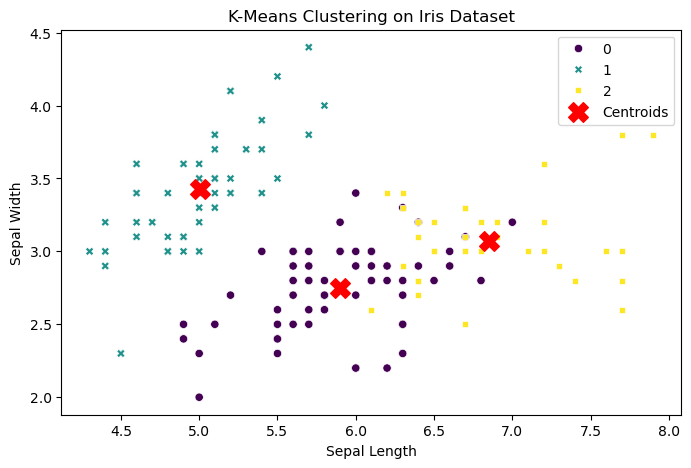

In [7]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

os.environ["OMP_NUM_THREADS"] = "1"

warnings.filterwarnings("ignore", category=UserWarning)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
df["Cluster"] = kmeans.fit_predict(df)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df["Cluster"], palette="viridis", style=df["Cluster"])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="X", s=200, label="Centroids")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

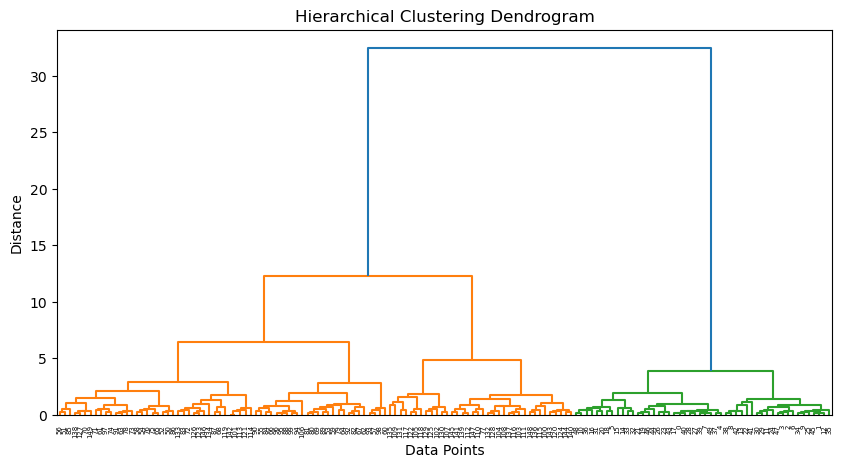

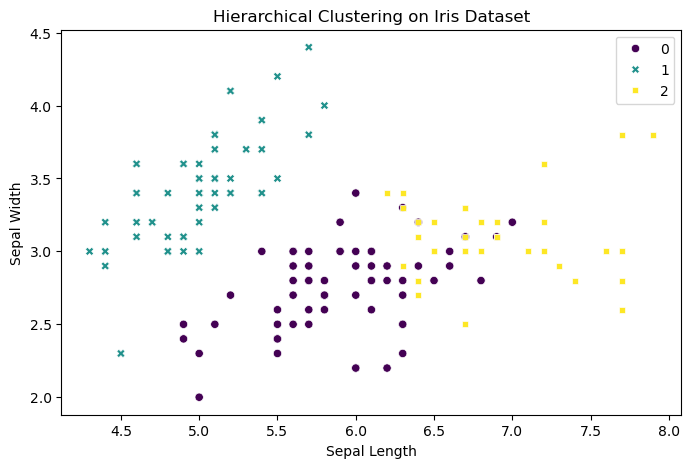

In [9]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

warnings.filterwarnings("ignore", category=UserWarning)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df["Cluster"] = hierarchical.fit_predict(df)

plt.figure(figsize=(10, 5))
linked = linkage(df.iloc[:, :-1], method="ward")  
dendrogram(linked, labels=df.index, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df["Cluster"], palette="viridis", style=df["Cluster"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Hierarchical Clustering on Iris Dataset")
plt.legend()
plt.show()